In [20]:
# Importamos las librerías básicas:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator


import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


warnings.filterwarnings('ignore') # Para evitar los molestos avisos.

pd.set_option('display.max_colwidth', 200)
pd.options.display.max_columns = None


%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

plt.style.use("_mpl-gallery-nogrid")

In [21]:
# Asignamos los datos a un dataframe:
df_fallecimientos = pd.read_csv('../data/df_fallecimientos.csv')
df_victimas = pd.read_excel(io='../data/homicidios.xlsx',sheet_name ='VICTIMAS',)
df_diccionario_fallecimientos = pd.read_csv('../data/diccionarios/diccionario_valores_de_variables_del_df_homicidios.csv')
df_diccionario_variables_del_df_victimas = pd.read_csv('../data/diccionarios/diccionario_de_variables_y_definiciones_del_df_victimas.csv')

----

In [22]:
df=df_fallecimientos

In [23]:
df.columns

Index(['id', 'n_victimas', 'fecha', 'aaaa', 'mm', 'dd', 'hora', 'hh',
       'lugar_del_hecho', 'tipo_de_calle', 'calle', 'altura', 'cruce',
       'direccion_normalizada', 'comuna', 'xy', 'x', 'y', 'participantes',
       'victima', 'acusado', 'ubicacion'],
      dtype='object')

In [24]:
df_moto = df[df.victima.str.contains('MOTO')]

In [25]:
df_moto

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,direccion_normalizada,comuna,xy,x,y,participantes,victima,acusado,ubicacion
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,"FERNANDEZ DE LA CRUZ, F., GRAL. AV."
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2034.0
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,"VILLEGAS, CONRADO, GRAL."
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,"SAENZ PE?A, LUIS, PRES."
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,27 DE FEBRERO AV.,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,ESCALADA AV.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,2021-0089,1,2021-12-02,2021,12,2,01:10:00,1,AV. GAONA 3655,AVENIDA,GAONA AV.,3655.0,NaN,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO,3655.0
689,2021-0091,1,2021-12-11,2021,12,11,23:00:00,23,BAIGORRIA Y VICTOR HUGO,CALLE,BAIGORRIA,NaN,"HUGO, VICTOR","BAIGORRIA y HUGO, VICTOR",10,Point (94810.03686085 100710.80080255),-58.51989389,-34.62284918,MOTO-AUTO,MOTO,AUTO,"HUGO, VICTOR"
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,MOM
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,LACARRA AV.


----

# ¿Cómo ha variado la frecuencia de motociclistas fallecidos en accidentes viales entre 2016 y 2021?

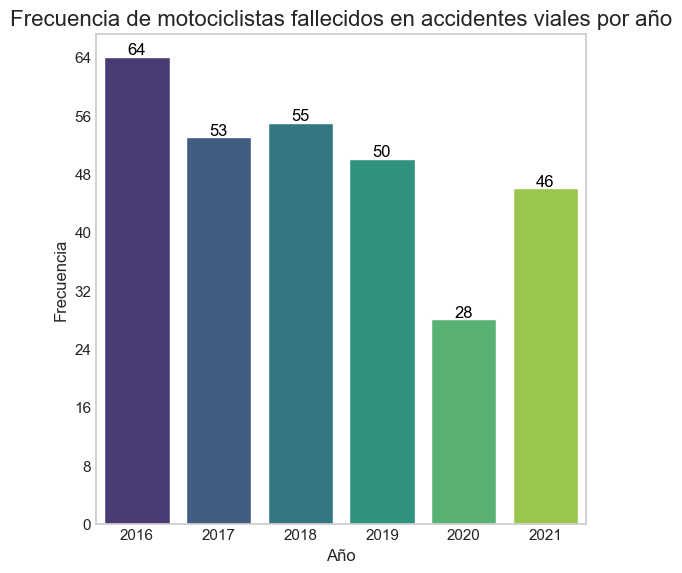

In [48]:
# Gáfico: Frecuencia de motociclistas fallecidos en accidentes viales por año

# Agrupamos los datos por año y acusado y contamos la frecuencia de accidentes
data_grouped = df_moto.groupby(['aaaa', 'acusado']).size().reset_index(name='frecuencia')

# Creamos el gráfico de barras
plt.figure(figsize=(5, 5))

ax = sns.countplot(data=df_moto, x='aaaa',  palette='viridis')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Título y etiquetas
plt.title('Frecuencia de motociclistas fallecidos en accidentes viales por año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostramos el gráfico
plt.show()

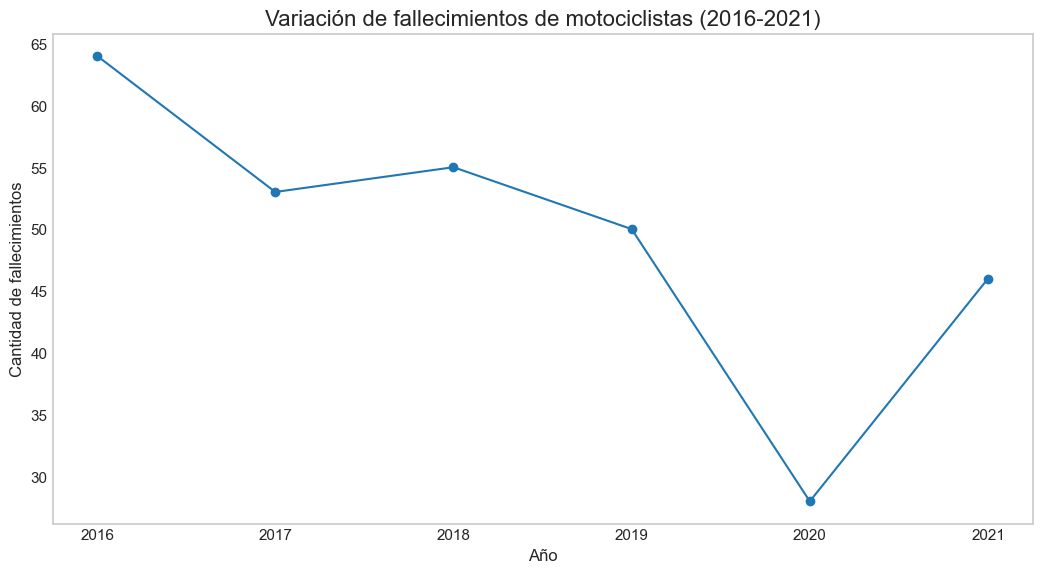

In [27]:
# Gráfico: Variación de fallecimientos de motociclistas (2016-2021)

# Agrupamos por año y contamos la cantidad de accidentes de cada año
fallecimientos_por_año = df_moto.groupby('aaaa').size()

# Creamos el gráfico de líneas
plt.figure(figsize=(10, 5))
plt.plot(fallecimientos_por_año.index, fallecimientos_por_año.values, marker='o')

# Título y etiquetas
plt.title('Variación de fallecimientos de motociclistas (2016-2021)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de fallecimientos', fontsize=12)

# Mostramos el gráfico

plt.show()


Observamos un aumento en la cantidad de motociclistas fallecidos en accidentes de tráfico durante el período 2020-2021. Sin embargo, es importante tener en cuenta que en 2019 estuvieron en vigor en todo el territorio argentino medidas sanitarias como respuesta a la pandemia del virus COVID-19. Estas medidas incluyeron el Aislamiento Social, Preventivo y Obligatorio, que limitó drásticamente la circulación de personas en la vía pública. La disminución en la cantidad de personas circulando llevó a una reducción de accidentes de tráfico y, por lo tanto, de fallecimientos de motociclistas en accidentes viales.

Teniendo en cuenta esta información, podemos considerar el punto correspondiente al año 2020 como un valor atípico causado por las medidas sanitarias tomadas durante la pandemia. Por este motivo, lo excluiremos y realizaremos el análisis centrado en los años 2016, 2017, 2018, 2019 y 2021. Al analizar la curva con estas consideraciones, observamos que la frecuencia de motociclistas fallecidos en accidentes viales en el período analizado posee una tendencia descendente.


----

## KPI 2: Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior


La cantidad de accidentes mortales de motociclistas en siniestros viales se ha definido como: el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

# ¿Cuál fue la variación de la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior?

In [28]:
df_con_2020 = df_moto.groupby('aaaa')['n_victimas'].size().reset_index()
df_con_2020['porcentaje_de_cambio'] = round(df_con_2020.n_victimas.pct_change()* 100,2)
df_con_2020

,aaaa,n_victimas,porcentaje_de_cambio
0,2016,64,NaN
1,2017,53,-17.19
2,2018,55,3.77
3,2019,50,-9.09
4,2020,28,-44.00
5,2021,46,64.29


In [29]:
#sin 2020
df_sin_2020 = df_moto.groupby('aaaa')['n_victimas'].size().reset_index()
df_sin_2020 = df_sin_2020.drop(4)
df_sin_2020['porcentaje_de_cambio'] = round(df_sin_2020.n_victimas.pct_change()* 100,2)
df_sin_2020

,aaaa,n_victimas,porcentaje_de_cambio
0,2016,64,NaN
1,2017,53,-17.19
2,2018,55,3.77
3,2019,50,-9.09
5,2021,46,-8.00


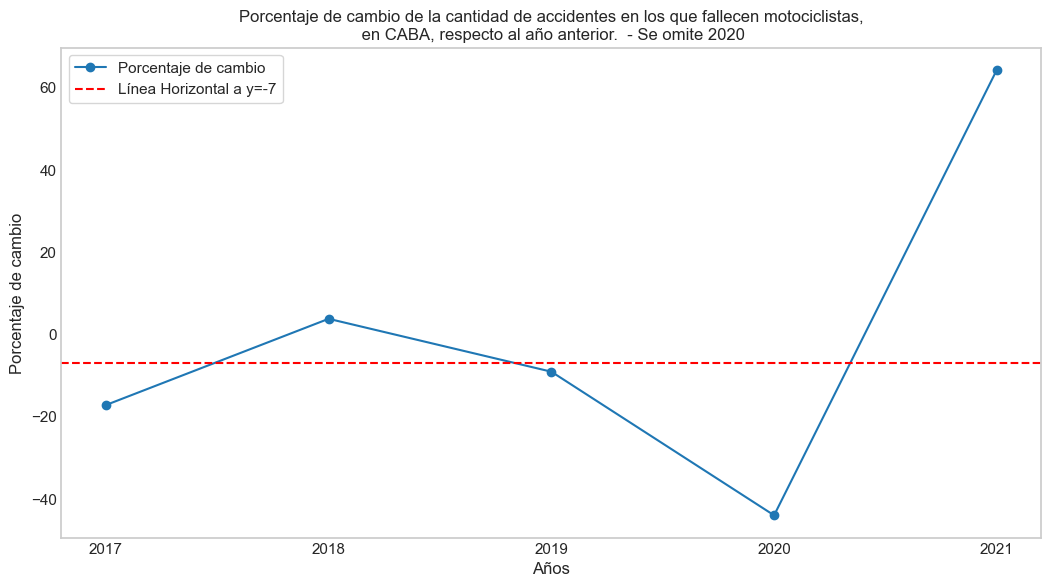

In [30]:
# Gráfico: Porcentaje de cambio de los fallecimiento de \n motociclistas, en CABA, respecto al año anterior. \n (Se omite 2020)

# Creamos el gráfico de líneas
fig, (ax) = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(df_con_2020.aaaa, df_con_2020.porcentaje_de_cambio, marker='o', label='Porcentaje de cambio')
ax.axhline(y=-7, color='r', linestyle='--', label='Línea Horizontal a y=-7')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Título y etiquetas
ax.set_xlabel('Años')
ax.set_ylabel('Porcentaje de cambio')
ax.set_title('Porcentaje de cambio de la cantidad de accidentes en los que fallecen motociclistas,\n en CABA, respecto al año anterior.  - Se omite 2020')
ax.legend()


# Mostramos el gráfico
plt.show()


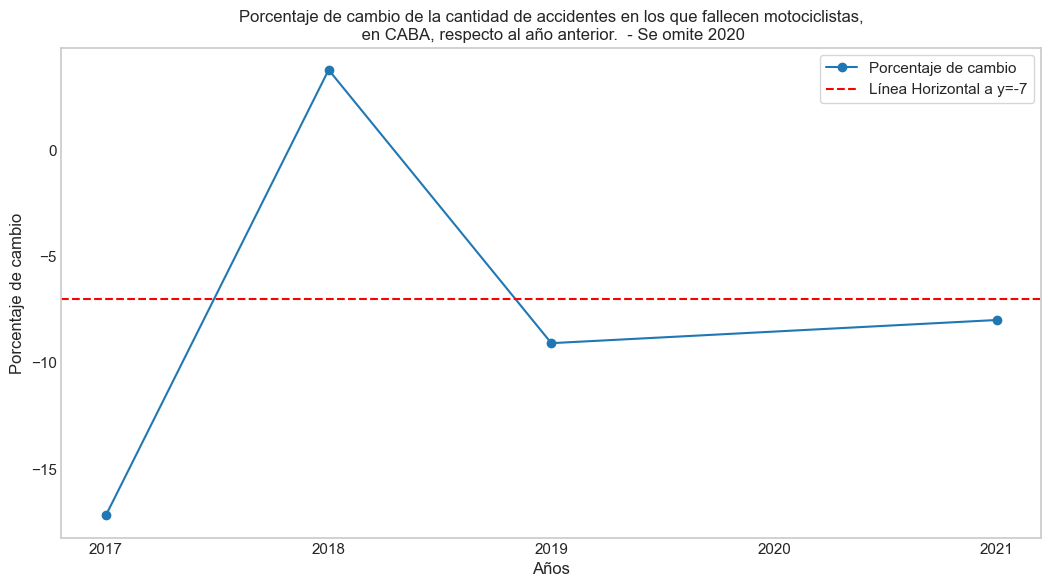

In [31]:
# Gráfico: Porcentaje de cambio de los fallecimiento de \n motociclistas, en CABA, respecto al año anterior. \n (Se omite 2020)

# Creamos el gráfico de líneas
fig, (ax) = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(df_sin_2020.aaaa, df_sin_2020.porcentaje_de_cambio, marker='o', label='Porcentaje de cambio')
ax.axhline(y=-7, color='r', linestyle='--', label='Línea Horizontal a y=-7')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Título y etiquetas
ax.set_xlabel('Años')
ax.set_ylabel('Porcentaje de cambio')
ax.set_title('Porcentaje de cambio de la cantidad de accidentes en los que fallecen motociclistas,\n en CABA, respecto al año anterior.  - Se omite 2020')
ax.legend()


# Mostramos el gráfico
plt.show()



Podemos ver que a partir de 2018 el indicador se cumplió. Las variaciones en el porcentaje de cambio estudiado con respecto al año anterior son menores al 7% planteado como objetívo. Nota: Debido a la pandemia sufrida en 2020 los datos de este año no se tomaron en cuenta para este anánilis, ya que dicho año presento restricciones en la circulacion de las personas en la vía pública.

----

# Entre 2016 y 2021, ¿Cuál fue la frecuencia de participación de cada tipo de vehículo en accidentes viales en los que falleció un motociclista?

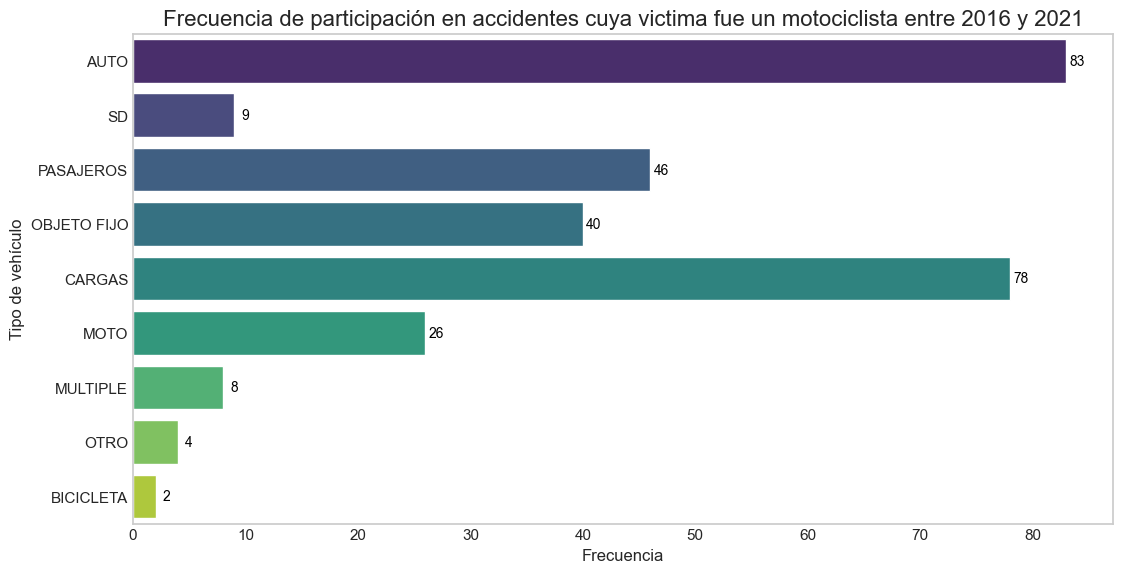

In [32]:
# Gráfico: Frecuencia de participación en accidentes cuya victima fue un motociclista entre 2016 y 2021

# Creamos el gráfico de líneas
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_moto, y='acusado', palette='viridis')

# Valores en las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(8, 0), textcoords='offset points')
    
# Título y etiquetas
plt.title('Frecuencia de participación en accidentes cuya victima fue un motociclista entre 2016 y 2021', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Tipo de vehículo', fontsize=12)

# Mostrar el gráfico
plt.show()


Entre 2016 y 2021 podemos ver que la mayoría de los accidentes en los que falleció un motociclista involucraron, automóviles y transporte de cargas. En tercer lugar y cuarto lugar se encontraron los transportes de pasajeros y de cargas.

# Entre 2016 y 2021, ¿Cuál fue la frecuencia de cada tipo de vehículo involucrado en accidentes viales en los que fallece un motociclista por año?

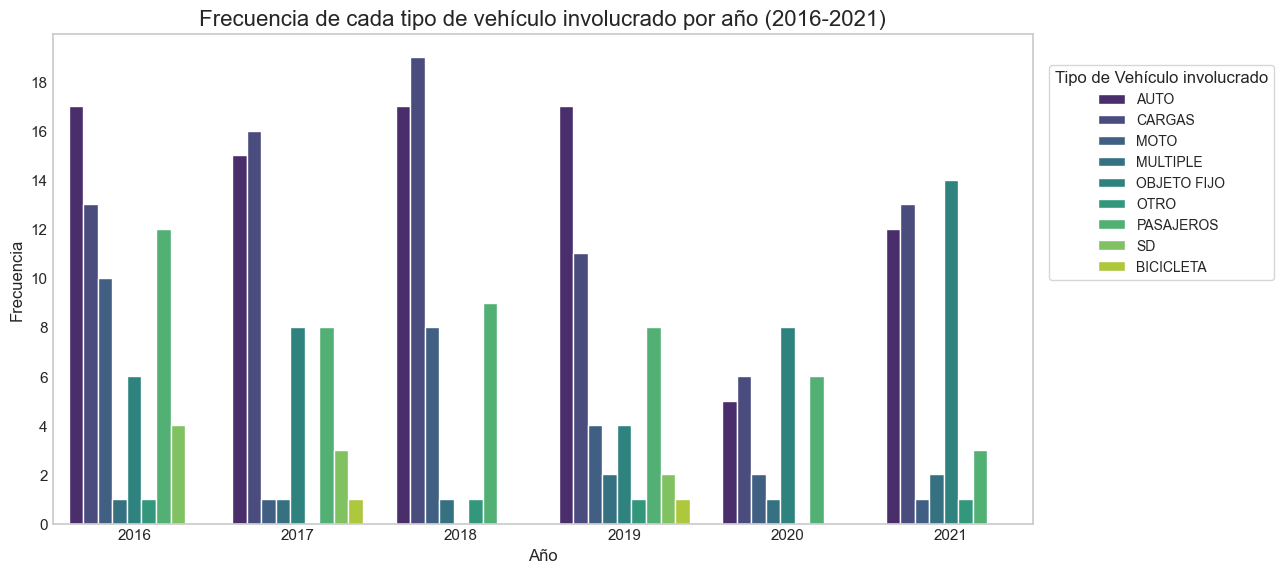

In [33]:
# Gráfico: Frecuencia de cada tipo de vehículo involucrado por año (2016-2021)

# Agrupamos por año y acusado y contar la frecuencia de accidentes.
data_grouped = df_moto.groupby(['aaaa', 'acusado']).size().reset_index(name='frecuencia')

# Creamos un gráfico de barras agrupadas
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_grouped, x='aaaa', y='frecuencia', hue='acusado', ci=None,  palette='viridis')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Título y etiquetas
plt.title('Frecuencia de cada tipo de vehículo involucrado por año (2016-2021)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Tipo de Vehículo involucrado', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.01, 0.95))

# Mostramos el gráfico
plt.show()


Podemos notar que ha variado la frecuencia de participación de las distintas categorías de vehículos involucrados en accidentes en los que fallece un motociclista en el periodo analizado.
Previo a 2020, la mayor frecuencia de participación en accidentes de tránsito oscilaba entre los automóviles y los transportes de carga. Luego del 2020, los automóviles y los transportes de carga continuaron en los primeros lugares de participación, pero los fallecimientos de motociclistas en accidentes que involucraron motos y objetos fijos presentaron una tendencia ascendente desde 2018. En 2021, los objetos fijos ocuparon el primer lugar de participación en accidentes de tránsito cuya víctima fue un motociclista.

# ¿Cuál fue la comuna que presentó mayor frecuencia de accidentes de tránsito que produjeron el fallecimiento de un motociclista?

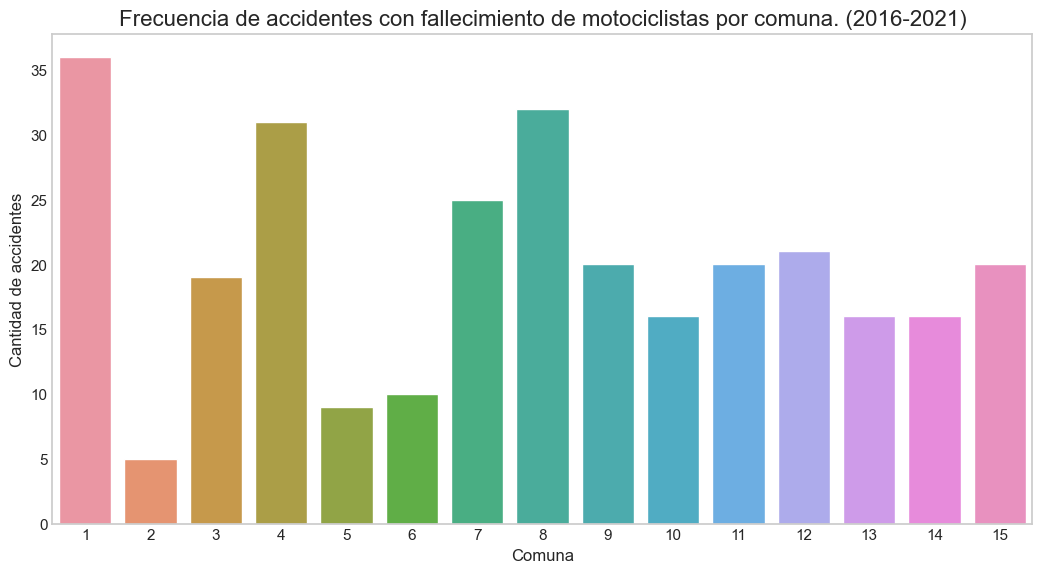

In [34]:
# Gráfico: Frecuencia de ccidentes con fallecimiento de motociclistas por comuna. (2016-2021)

# Agrupamos por municipio y cuentamos la cantidad de accidentes con fallecimiento de motociclistas
accidentes_por_municipio = df_moto['comuna'].value_counts()

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 5))
sns.barplot(x=accidentes_por_municipio.index, y = accidentes_por_municipio.values,) #palette='colorblind')

# Título y etiquetas
plt.title('Frecuencia de accidentes con fallecimiento de motociclistas por comuna. (2016-2021)', fontsize=16)
plt.xlabel('Comuna', fontsize=12)
plt.ylabel('Cantidad de accidentes', fontsize=12)

# Mostrar el gráfico
plt.show()

# # Filtramos el municipio con la mayor cantidad de accidentes
# municipio_max_accidentes = accidentes_por_municipio.idxmax()
# print(f'La comuna con más accidentes de motociclistas fallecidos es la comuna {municipio_max_accidentes}')


La comuna que presentó mayor cantidad de accidentes de tránsito entre 2016 y 2021 fue la comuna 1, seguida de las comunas 8 y 4. La comuna 2 Es la comuna que presentó menor cantidad de accidentes de tránsito en el período analizado.

Realizaremos el analisis para ver la recuencia de accidentes por comuna y por año

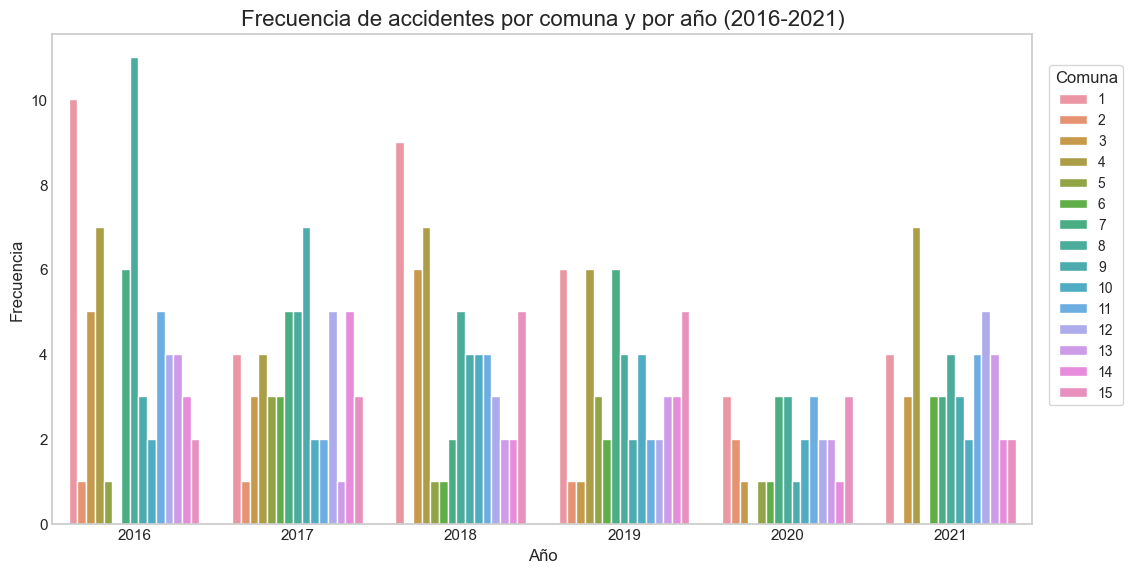

In [35]:
# Gráfico: Frecuencia de accidentes por comuna y por año (2016-2021)

# Agrupamos por año y comuna y contamos la frecuencia de accidentes
data_grouped = df_moto.groupby(['aaaa', 'comuna']).size().reset_index(name='frecuencia')

# Creamos el gráfico de barras agrupadas
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=data_grouped, x='aaaa', y='frecuencia', hue='comuna', ci=None,) # palette='colorblind')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Título y etiquetas
plt.title('Frecuencia de accidentes por comuna y por año (2016-2021)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la leyenda
plt.legend(title='Comuna', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.01, 0.95))

# Mostrar el gráfico
plt.show()

En el gráfico anterior podemos ver como ha ido variando la frecuencia de accidentes de tránsito por comuna en el período anaizado.
Podemos notar que en la comuna 4 se produjo la mayor cantidad de accidentes de tránsito con fallecimientos de motociclistas en 2021, sin embargo esta comuna mantiene en un rango de 4 a 7 víctimas en el período analizado.
La comuna 2 es la que posee menor cantidad de accidentes viales con fallecimiento de motociclistas a en el período analizado. En el año 2018 no se produjeron fallecimientos de motociclistas en esta comuna.

# ¿Cuál ha sido la evolución de la frecuencia de accidentes por la comuna?

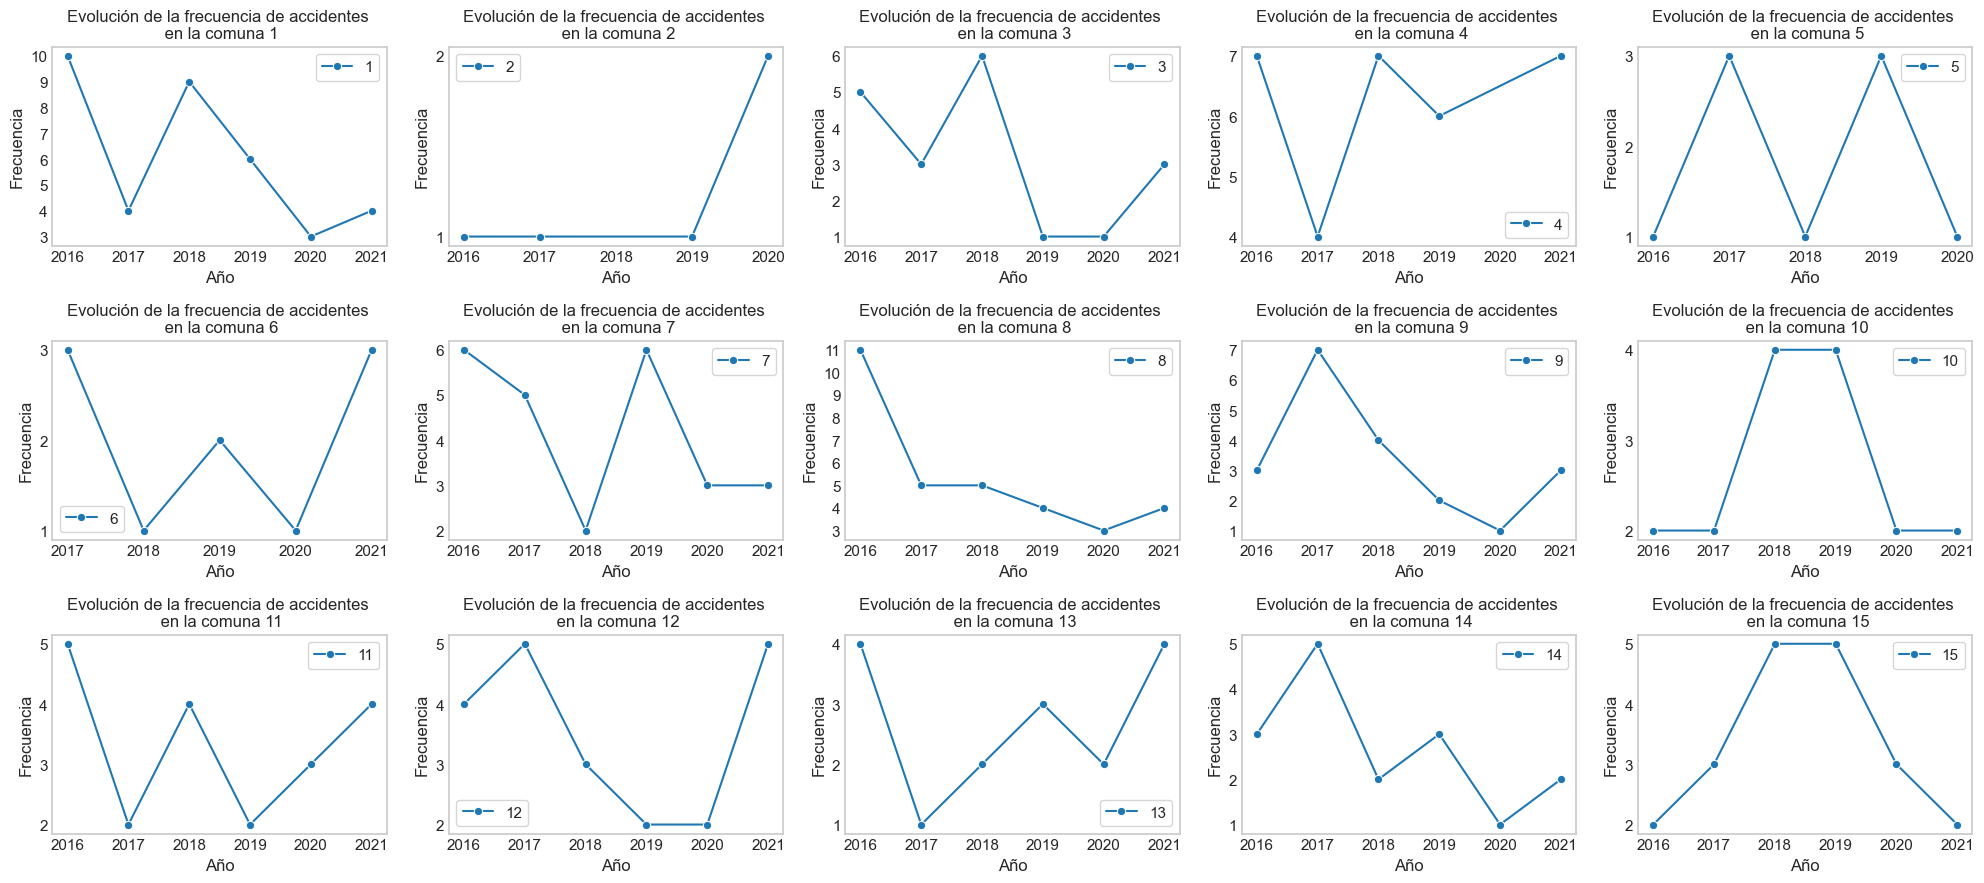

In [36]:
# Gráfico: Evolución de la frecuencia de accidentes por la comuna

# Agrupamos por año y comuna y contamos la frecuencia
data_grouped = df_moto.groupby(['aaaa', 'comuna']).size().reset_index(name='frecuencia')

# Creamosuna lista de las comunas
comunas = sorted(data_grouped['comuna'].unique())

# Calculamos las dimensiones de la matriz de figuras
num_comunas = len(comunas)
cols = 5  
rows = (num_comunas + 1) // cols 

# Creamos la matriz de figuras
fig, axes = plt.subplots(rows, cols, figsize=(20, rows*3))

# # Aseguramos que axes sea un array 2D
# if rows == 1:
#     axes = axes.reshape(1, -1)
# elif cols == 1:
#     axes = axes.reshape(-1, 1)

# Creamos un gráfico de líneas para cada comuna
for i, comuna in enumerate(comunas):
    # Ubicamos el gráfico
    row = i // cols
    col = i % cols
    ax = axes[row][col]
    
    #Agrupamos los datos por comuna
    data_comuna = data_grouped[data_grouped['comuna'] == comuna]

    #Creamos el gráfico
    sns.lineplot(data=data_comuna, x='aaaa', y='frecuencia', ax=ax, label=comuna, marker='o', )#color='#0072B2')
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Título y etiquetas
    ax.set_title(f'Evolución de la frecuencia de accidentes \n en la comuna {comuna}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Frecuencia')
    ax.legend()

# Ajustamos espaciado entre subgráficos
plt.tight_layout()

# Mostramos los gráficos
plt.show()


Podemos observar como han ido variando la cantidad de accidentes en cada comuna.

    - En 2016 las comunas con mayor cantidad de accidentes fueron la 1 y la 8. 
    - En 2017 la comunas con mayor cantidad de accidentes fue la 9. 
    - En 2018 las comunas con mayor cantidad de accidentes fueron la 1 y la 4. 
    - En 2019 las comunas con mayor cantidad de accidentes fueron la 1 y la 4 y la 7. 
    - El 2020 no lo analizaremos debido a las medidas tomadas durante la pandemia.
    - En 2021 las comunas con mayor cantidad de accidentes fueron la 4 y la 12. 

Podemos destacar que las comunas 1, 3, 8 y 14 poseen una tendencia descendente de la frecuencia de accidentes que involucraron el fallecimiento de motociclistas.. Las comunas 12 y 13 presentan una tendencia ascendente.

La comuna 2 presentó la menor cantidad de accidentes a lo largo del tiempo.


# ¿Cuál fue el tipo de vehículo que causó mayor cantidad de fallecimientos de motociclistas por comuna y por año? 

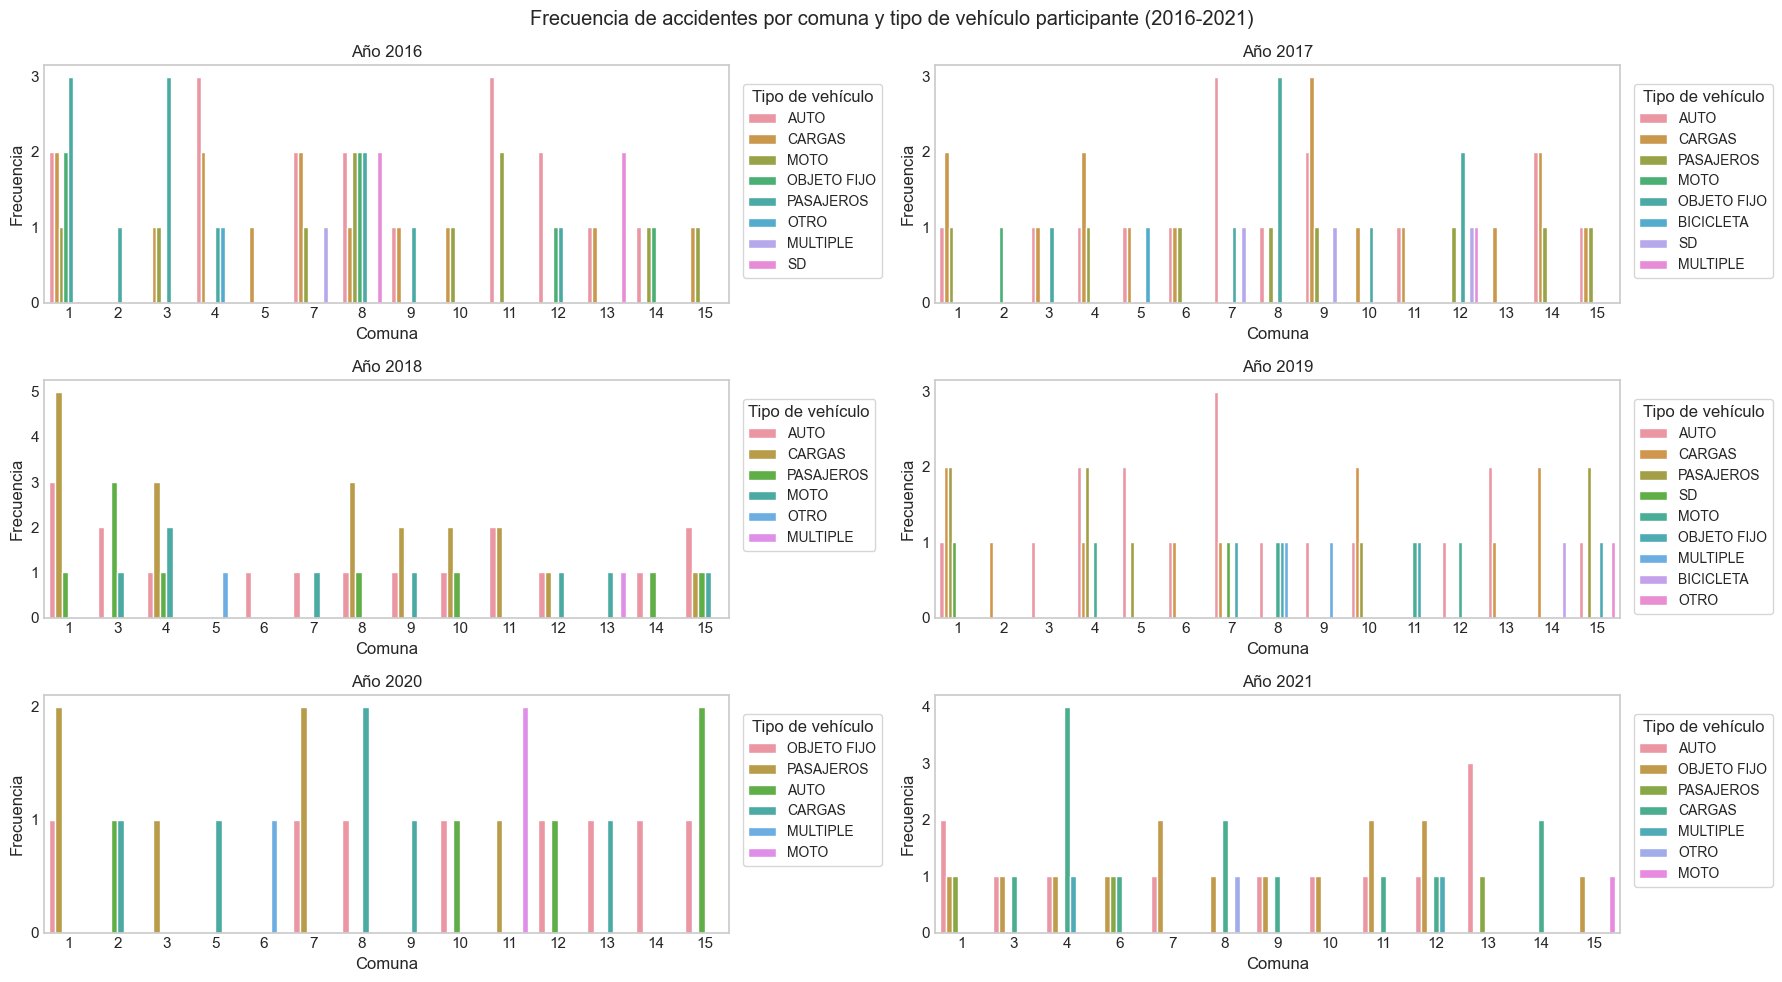

In [55]:
# Obtener los años de 2016 a 2021
anios = range(2016, 2022)

# Creamos el gráfico
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))

# Iteramos sobre los años y generamos el gráfico para cada año
for i, anio in enumerate(anios):
    df_anio = df_moto[df_moto['aaaa'] == anio]

    # Agrupamos por comuna y acusado y contamos la frecuencia
    data_grouped = df_anio.groupby(['comuna', 'acusado']).size().reset_index(name='frecuencia')

    # Seleccionar el eje correspondiente
    ax = axes[i // 2, i % 2]

    # Creamos el gráfico
    sns.barplot(data=data_grouped, x='comuna', y='frecuencia', hue='acusado', ci=None, ax=ax)#palette='colorblind', ax=ax)
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Título y etiquetas
    ax.set_title(f'Año {anio}')
    ax.set_xlabel('Comuna')
    ax.set_ylabel('Frecuencia')
    ax.legend(title='Tipo de vehículo', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.01, 0.95))

# Título general
fig.suptitle('Frecuencia de accidentes por comuna y tipo de vehículo participante (2016-2021)')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Podemos observar como han ido variando la participación de los tipos de vehículos en la cantidad de accidentes en cada comuna.
En la comuna 4 aumentaron los accidentes en los que participaban transportes de carga, ocupando el primer lugar en vehículos participantes en accidentes con fallecimiento de motociclistas en 2021. Tambien podemos notar que los choques con objetos fijos es un factor común a varias comunas.


# ¿En qué tipo de calle se produjeron con mayor frecuencia los accidentes que involucraron el fallecimiento de un motociclista?

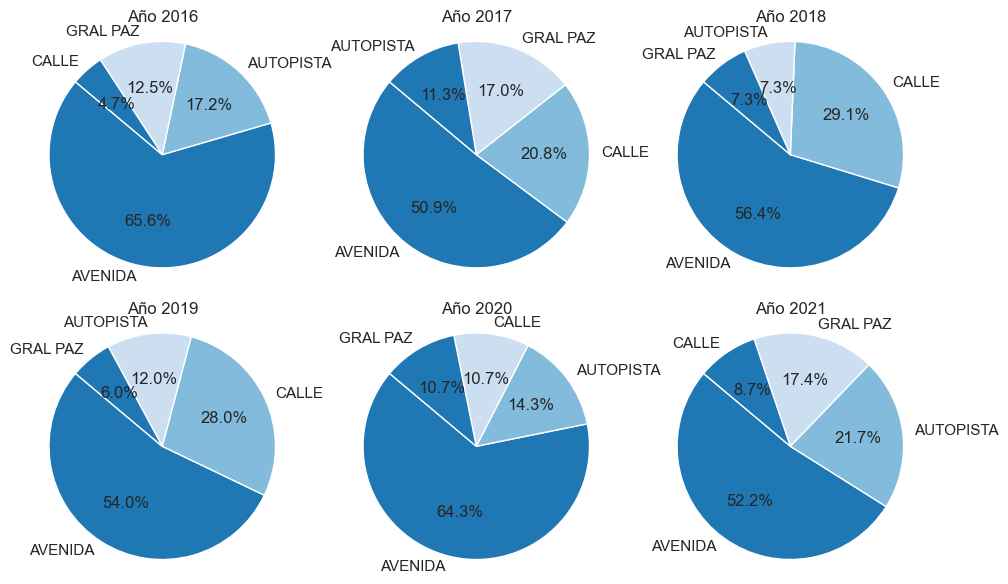

In [38]:
# Obtener los años de 2016 a 2021
years = range(2016, 2022)

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Creamos el gráfico de torta para cada año
for i, year in enumerate(years):
    df_year = df_moto[df_moto['aaaa'] == year]

    # Contamos la frecuencia de cada tipo de calle
    tipo_de_calle_counts = df_year['tipo_de_calle'].value_counts()

    # Seleccionamos el eje correspondiente
    ax = axes[i // 3, i % 3]

    # Crear el gráfico de torta
    ax.pie(tipo_de_calle_counts, labels=tipo_de_calle_counts.index, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(f'Año {year}')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


La mayor cantidad de accidentes de motos ente 2016 y 2022 se produjeron en una avenida.

-----------

# Analísis de datos de 2021

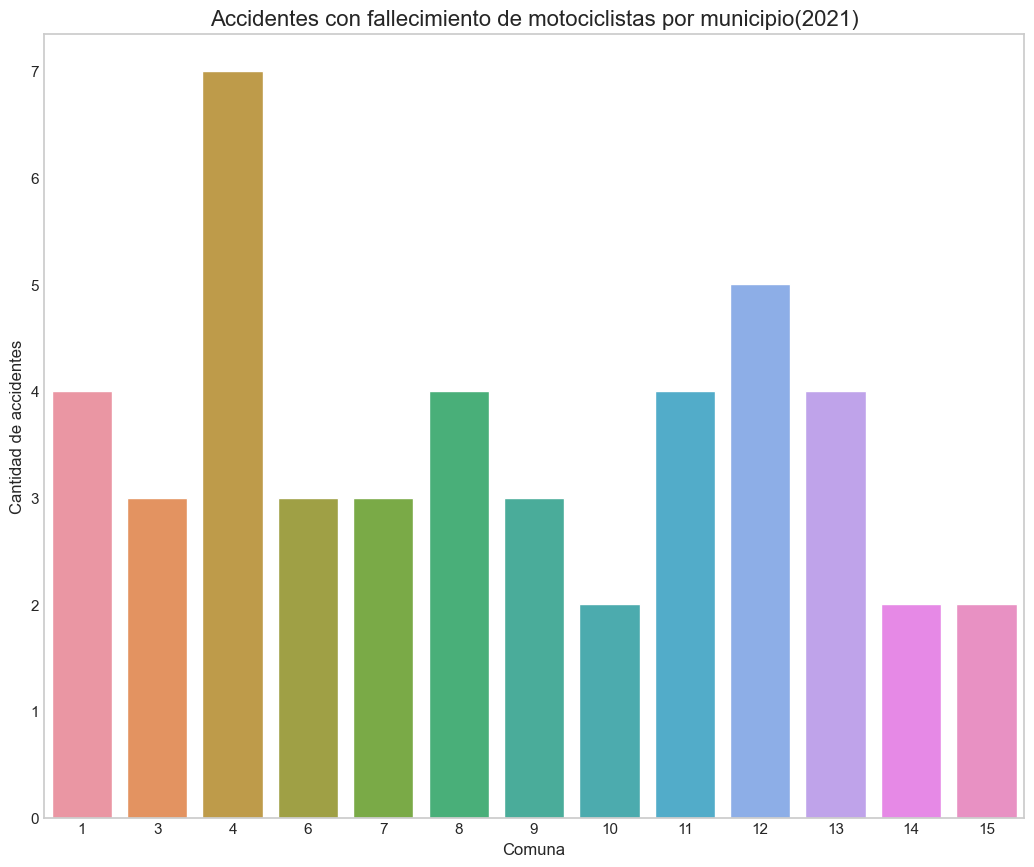

In [39]:
df = df_moto[df_moto.aaaa==2021]
# Agrupa por municipio y cuenta la cantidad de accidentes con fallecimiento de motociclistas
accidentes_por_municipio = df['comuna'].value_counts()

# Filtra el municipio con la mayor cantidad de accidentes
municipio_max_accidentes = accidentes_por_municipio.idxmax()

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 8))
sns.barplot(x=accidentes_por_municipio.index, y = accidentes_por_municipio.values, )#palette='colorblind')

# Agregar título y etiquetas de ejes
plt.title('Accidentes con fallecimiento de motociclistas por municipio(2021)', fontsize=16)
plt.xlabel('Comuna', fontsize=12)
plt.ylabel('Cantidad de accidentes', fontsize=12)


# Mostrar el gráfico
plt.show()

# print(f'La comuna con más accidentes de motociclistas fallecidos en 2021 fue la comuna {municipio_max_accidentes}')

La comuna con más accidentes de motociclistas fallecidos en 2021 fue la comuna 4. En la comuna 2 y  no se produjeron este tipo de accidentes en 2021.

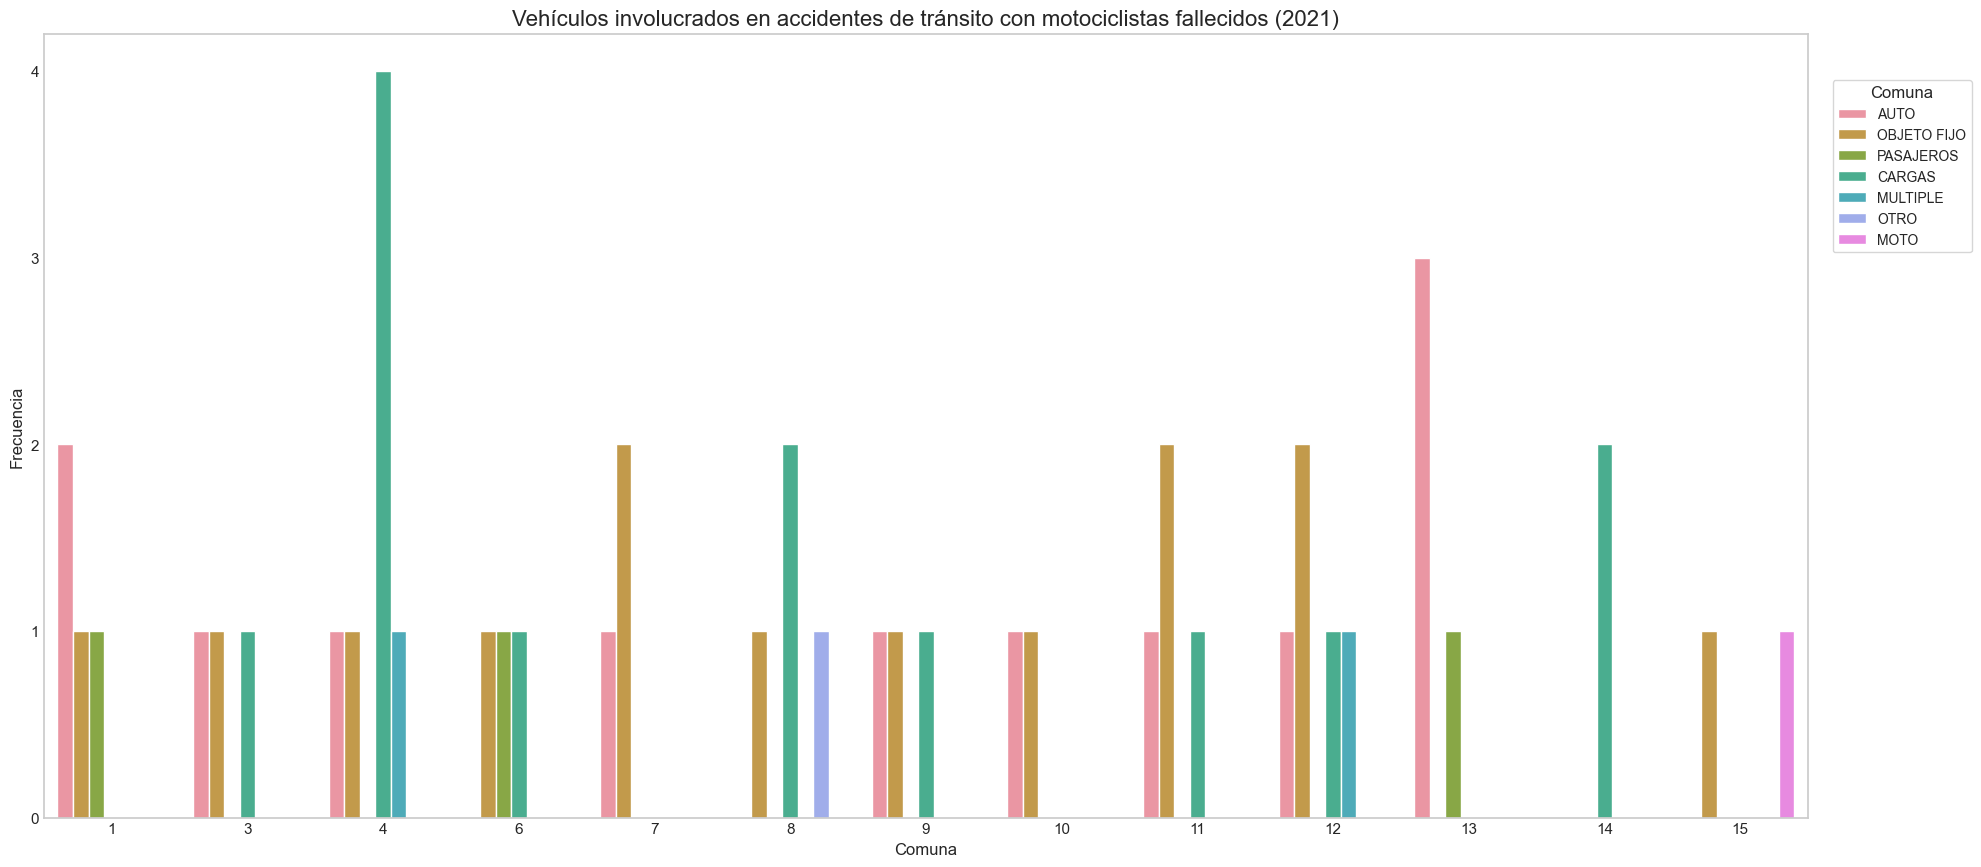

In [40]:
# Gráfico: Vehículos involucrados en accidentes de tránsito con motociclistas fallecidos (2021)

# filtramos por año el 2021 y agrupamos por año y acusado y contar la frecuencia
df= df_moto[df_moto.aaaa==2021]
data_grouped = df.groupby(['comuna', 'acusado']).size().reset_index(name='frecuencia')

# Creamos un gráfico de barras agrupadas
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=data_grouped, x='comuna', y='frecuencia', hue='acusado', ci=None, )# palette='colorblind')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Título y etiquetas
plt.title('Vehículos involucrados en accidentes de tránsito con motociclistas fallecidos (2021)', fontsize=16)
plt.xlabel('Comuna', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Comuna', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.01, 0.95))

# Mostramos el gráfico
plt.show()

En la comuna 4, los transportes de cargas tuvieron la mayor participación en accidentes de tránsito en los que fallecieron motociclistas en 2021 y que los autos ocuparon ese puesto en la comuna 13. Los accidentes con objetos fijos fueron comunes a varias comunas.

Los dos gráficos anteriores nos muestran que en 2021 no se produjeron accidentes en las comunas 2 y 5. (También puede indicar que no poseemos esos datos.)

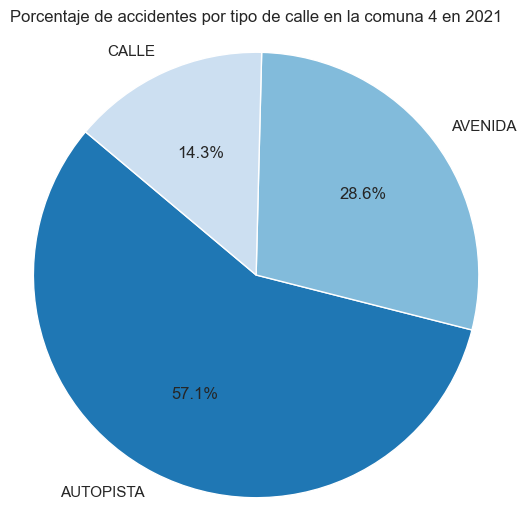

In [41]:
# Porcentaje de accidentes por tipo de calle en 2021 en la comuna 4

#Filtra los datos para el año 2021 y agrupamos por tipo de calle y cuenta la frecuencia
df_2021 = df_moto[((df_moto['aaaa'] == 2021) & (df_moto.comuna == 4))]
porcentaje_tipo_calle = df_2021['tipo_de_calle'].value_counts(normalize=True) * 100

# Creamos el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(porcentaje_tipo_calle, labels=porcentaje_tipo_calle.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo

# Título
plt.title('Porcentaje de accidentes por tipo de calle en la comuna 4 en 2021')

# Mostramos el gráfico
plt.show()


Podemos notar que la mayor cantidad de accidentes en los que falleció un motociclista en 2021 en la comuna 4 se produjeron en una autopista.

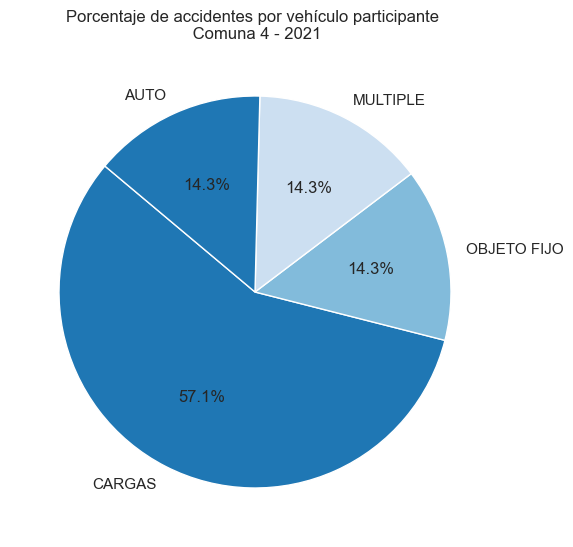

In [42]:
# Gráfico: Porcentaje de accidentes por vehículo participante - comuna 4 2021

# Filtramos los datos por el año 2021 y la comuna 4
df_2021 = df_moto[((df_moto['aaaa'] == 2021) & (df_moto.comuna == 4))]

# Agrupa por tipo de calle y cuenta la frecuencia
porcentaje_tipo_calle = df_2021['acusado'].value_counts(normalize=True) * 100

# Crear el gráfico de torta
plt.figure(figsize=(5,5))
plt.pie(porcentaje_tipo_calle, labels=porcentaje_tipo_calle.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de accidentes por vehículo participante \n Comuna 4 - 2021')
# plt.legend(porcentaje_tipo_calle.index, loc= 'best')
plt.show()


Podemos ver que en la comuna 4 en 2021 la mayor cantidad de accidentes con fallecimientos de motociclistas participaron transportes de cargas.

In [43]:
df_moto[((df_moto['aaaa'] == 2021) & (df_moto.comuna == 4))].groupby(['acusado','tipo_de_calle']).size().reset_index(name='frecuencia')

,acusado,tipo_de_calle,frecuencia
0,AUTO,AVENIDA,1
1,CARGAS,AUTOPISTA,2
2,CARGAS,AVENIDA,1
3,CARGAS,CALLE,1
4,MULTIPLE,AUTOPISTA,1
5,OBJETO FIJO,AUTOPISTA,1


El tipo de vehículo que mas participó en los accidentes considerados fueron los transportes de cargas y los tipos de calles donde se produjeron mas frecuentemente estos accidentes fueron las autopistas. En la tabla anterior podemos notar que estas dos variables son independientes.

----

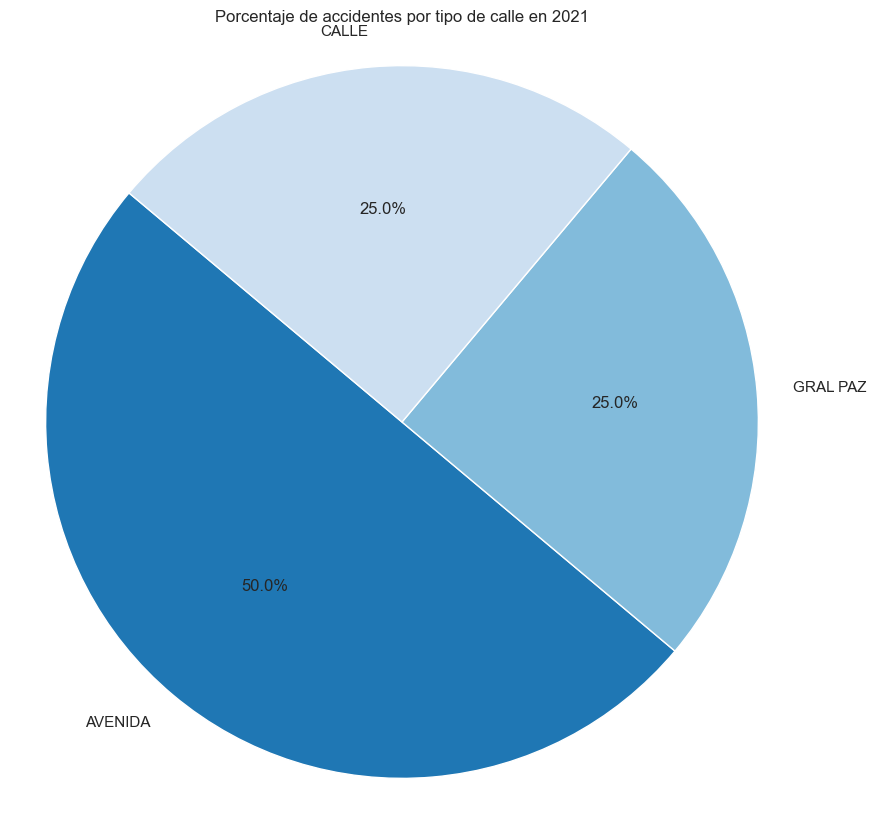

In [44]:
# comuna 13
import matplotlib.pyplot as plt

# Filtra los datos para el año 2021
df_2021 = df_moto[((df_moto['aaaa'] == 2021) & (df_moto.comuna == 13))]

# Agrupa por tipo de calle y cuenta la frecuencia
porcentaje_tipo_calle = df_2021['tipo_de_calle'].value_counts(normalize=True) * 100

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_tipo_calle, labels=porcentaje_tipo_calle.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.title('Porcentaje de accidentes por tipo de calle en 2021')
plt.show()

In [45]:
df_2021

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,calle,altura,cruce,direccion_normalizada,comuna,xy,x,y,participantes,victima,acusado,ubicacion
638,2021-0040,1,2021-05-20,2021,5,20,05:50:00,5,"PAZ, GRAL. AV. Y DEL LIBERTADOR AV.",GRAL PAZ,"PAZ, GRAL. AV.",NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.46743471,-34.53476874,MOTO-AUTO,MOTO,AUTO,DEL LIBERTADOR AV.
648,2021-0050,1,2021-06-10,2021,6,10,13:30:00,13,DEL LIBERTADOR AV. 5958,AVENIDA,DEL LIBERTADOR AV.,5958.0,NaN,DEL LIBERTADOR AV. 5958,13,Point (101448.53024105 107994.96785043),-58.44751621,-34.55719892,MOTO-PASAJEROS,MOTO,PASAJEROS,5958.0
681,2021-0083,1,2021-11-09,2021,11,9,00:35:00,0,CABILDO AV. Y OLAZABAL,AVENIDA,CABILDO AV.,NaN,OLAZABAL,CABILDO AV. y OLAZABAL,13,Point (100459.06991201 107666.84775309),-58.45829717,-34.56015762,MOTO-AUTO,MOTO,AUTO,OLAZABAL
686,2021-0088,1,2021-12-01,2021,12,1,15:40:00,15,AV. MOROE Y 3 DE FEBRERO,CALLE,MONROE,NaN,3 DE FEBRERO,MONROE y 3 DE FEBRERO,13,Point (100732.60222975 108177.68150062),-58.45531707,-34.55555257,MOTO-AUTO,MOTO,AUTO,3 DE FEBRERO


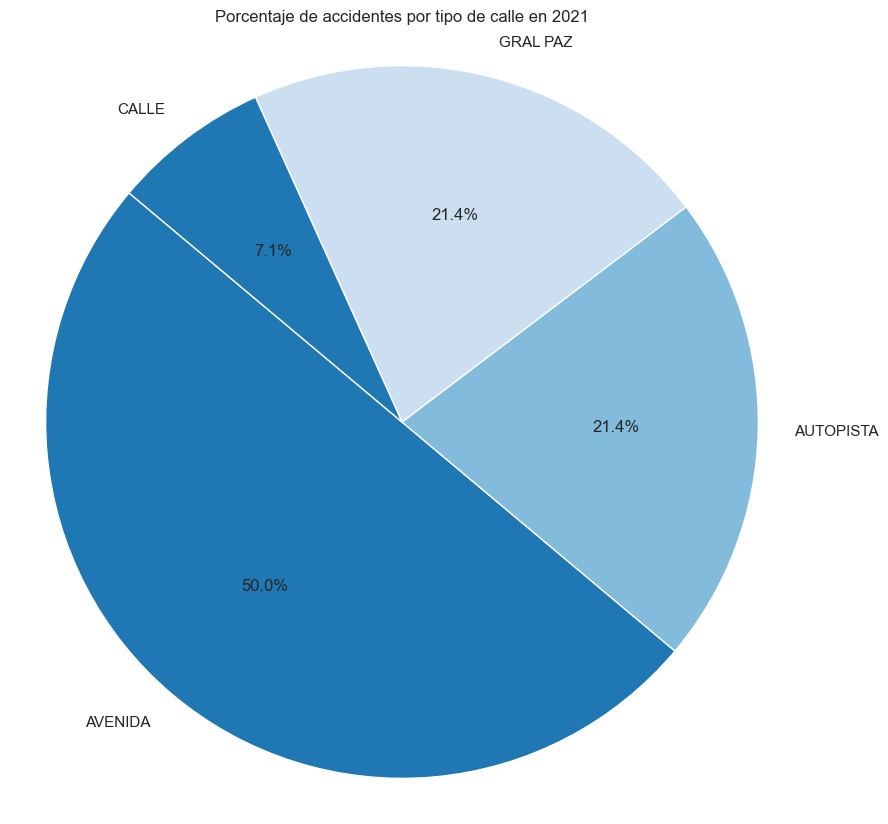

In [46]:
#choques con objeto fijo en 2021

import matplotlib.pyplot as plt

# Filtra los datos para el año 2021
df_2021 = df_moto[((df_moto['aaaa'] == 2021) & (df_moto.acusado == 'OBJETO FIJO'))]

# Agrupa por tipo de calle y cuenta la frecuencia
porcentaje_tipo_calle = df_2021['tipo_de_calle'].value_counts(normalize=True) * 100

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_tipo_calle, labels=porcentaje_tipo_calle.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.title('Porcentaje de accidentes por tipo de calle en 2021')
plt.show()

Podemos ver que la mayor canidad de accidentes se produjeron en avenidas
